#### IMPORTAÇÃO DAS BIBLIOTECAS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### TRATAMENTO DOS DADOS

In [2]:
MoS2_1H = pd.read_csv("MoS2_1H_1.txt", sep = '\t', engine='python', header=4)
MoS2_2H = pd.read_csv("MoS2_1H_1.txt", sep = '\t', engine='python', header=4)
MoS2_3H = pd.read_csv("MoS2_1H_1.txt", sep = '\t', engine='python', header=4)
MoS2_4H = pd.read_csv("MoS2_1H_1.txt", sep = '\t', engine='python', header=4)
MoS2_P = pd.read_csv("MoS2_Pristine_1.txt", sep = '\t', engine='python', header=4)
isopropanol = pd.read_csv("Isopropanol1.txt", sep = '\t', engine='python', header=4)

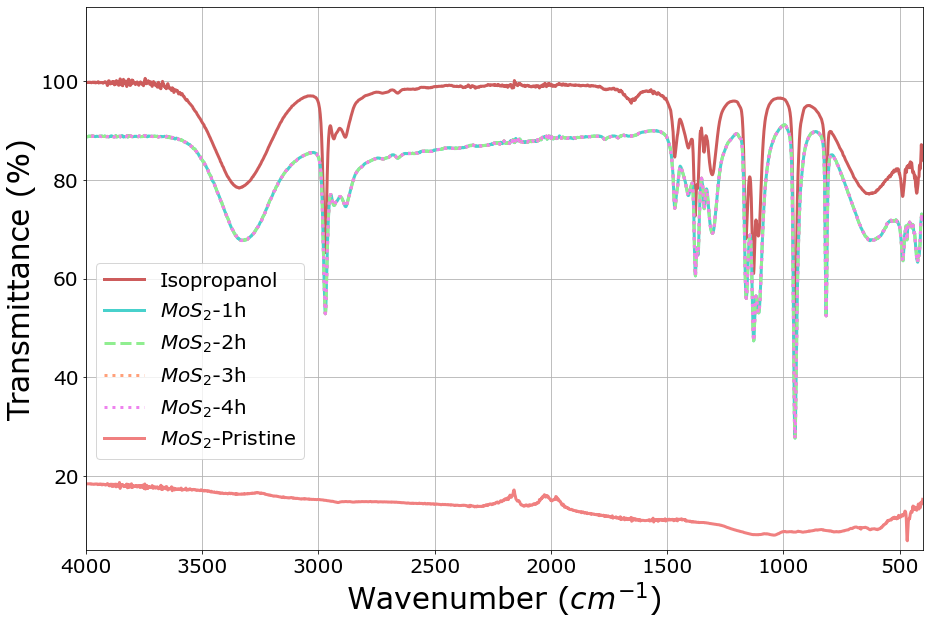

In [3]:
# Representação gráfica

plt.rcParams['font.family'] = 'Verdana'
plt.figure(figsize = (15, 10))
plt.plot(isopropanol.iloc[:,0], isopropanol.iloc[:,1], label = 'Isopropanol', linewidth=3, linestyle='-', color='indianred')
plt.plot(MoS2_1H.iloc[:,0], MoS2_1H.iloc[:,1], label = r'$MoS_2$-1h', linewidth=3, linestyle='-', color='mediumturquoise')
plt.plot(MoS2_2H.iloc[:,0], MoS2_2H.iloc[:,1], label = r'$MoS_2$-2h', linewidth=3, linestyle='--', color='lightgreen')
plt.plot(MoS2_3H.iloc[:,0], MoS2_3H.iloc[:,1], label = r'$MoS_2$-3h', linewidth=3, linestyle='dotted', color='lightsalmon')
plt.plot(MoS2_4H.iloc[:,0], MoS2_4H.iloc[:,1], label = r'$MoS_2$-4h', linewidth=3, linestyle=':', color='violet')
plt.plot(MoS2_P.iloc[:,0], MoS2_P.iloc[:,1], label = r'$MoS_2$-Pristine', linewidth=3, linestyle='-', color='lightcoral')
plt.xlabel(r'Wavenumber ($cm^{-1}$)', size=30)
plt.ylabel('Transmittance (%)', size=30)
#plt.title('FTIR', size=40)
plt.tick_params(labelsize=20)
plt.rcParams['legend.fontsize'] = 20
plt.xlim(min(MoS2_1H.iloc[:,0]),max(MoS2_1H.iloc[:,0]))
plt.ylim(5,115)
plt.grid()
plt.legend(loc='lower left', bbox_to_anchor=(0,0.15))
plt.gca().invert_xaxis()
plt.savefig('FTIR - MoS2', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

In [4]:
PDA = pd.read_csv("PDA_1.txt", sep = '\t', engine='python', header=4)
Silica = pd.read_csv("Silica_1.txt", sep = '\t', engine='python', header=4)
Silica_PDA = pd.read_csv("Silica+PDA_1.txt", sep = '\t', engine='python', header=4)
Silica_PDA_seco = pd.read_csv("Silica+PDA_Seco_1.txt", sep = '\t', engine='python', header=4)

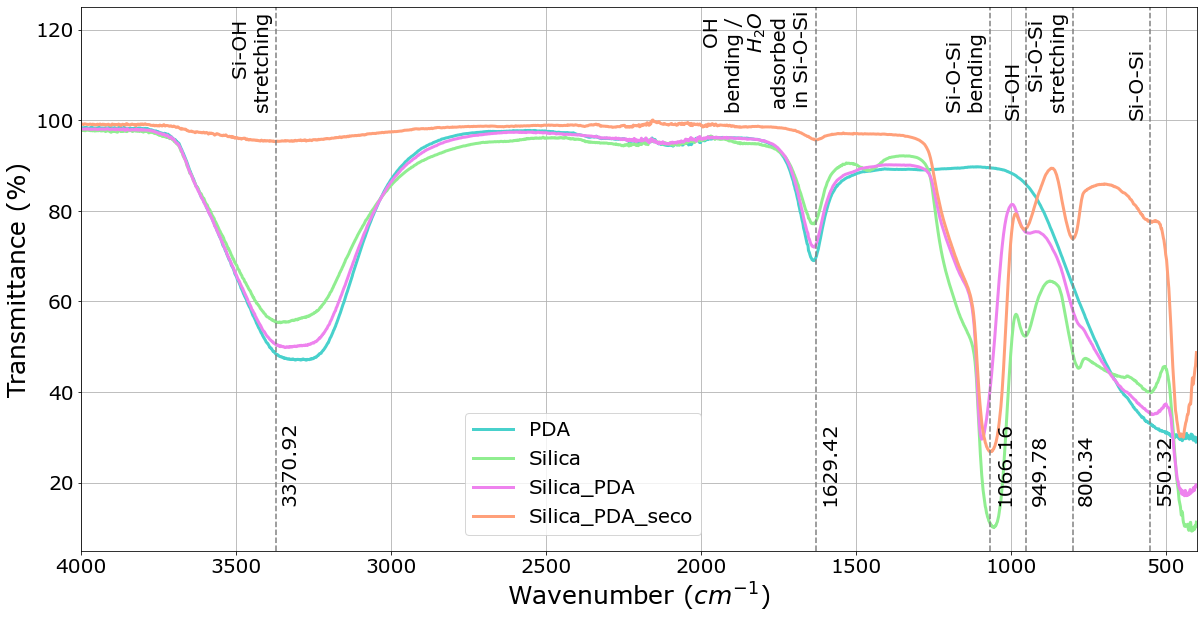

In [5]:
# Representação gráfica

plt.rcParams['font.family'] = 'Verdana'
plt.figure(figsize=(20, 10))
plt.plot(PDA.iloc[:, 0], PDA.iloc[:, 1], label='PDA', linewidth=3, linestyle='-', color='mediumturquoise')
plt.plot(Silica.iloc[:, 0], Silica.iloc[:, 1], label='Silica', linewidth=3, linestyle='-', color='lightgreen')
plt.plot(Silica_PDA.iloc[:, 0], Silica_PDA.iloc[:, 1], label='Silica_PDA', linewidth=3, linestyle='-', color='violet')
plt.plot(Silica_PDA_seco.iloc[:, 0], Silica_PDA_seco.iloc[:, 1], label='Silica_PDA_seco', linewidth=3, linestyle='-', color='lightsalmon')
plt.xlabel(r'Wavenumber ($cm^{-1}$)', size=25)
plt.ylabel('Transmittance (%)', size=25)
plt.tick_params(labelsize=20)
plt.rcParams['legend.fontsize'] = 20
plt.xlim(400, 4000)
plt.ylim(5, 125)
plt.grid()
plt.legend(loc='lower center', bbox_to_anchor=(0.45, 0.01))
plt.gca().invert_xaxis()

# Definir intervalos não equiespaçados
intervalos = [
    (550, 600),
    (800, 850),
    (900, 950),
    (1000, 1100),
    (1600, 1700),
    (3200, 3500)
]

# Encontrar o menor ponto em cada intervalo
minimos_encontrados = []

# Anotações específicas para cada ponto mínimo
anotacoes_especificas = [
    "Si-O-Si",
    "Si-O-Si \n stretching",
    "Si-OH",
    "Si-O-Si \n bending",
    "OH \n bending / \n $H_2O$ \n adsorbed \n in Si-O-Si",
    "Si-OH \n stretching"
]

for intervalo in intervalos:
    # Filtrar os dados dentro do intervalo
    dados_no_intervalo = Silica_PDA_seco[(Silica_PDA_seco.iloc[:, 0] >= intervalo[0]) & (Silica_PDA_seco.iloc[:, 0] <= intervalo[1])]
    
    if not dados_no_intervalo.empty:
        # Encontrar o mínimo dentro do intervalo
        idx_minimo = dados_no_intervalo.iloc[:, 1].idxmin()
        minimos_encontrados.append((Silica_PDA_seco.iloc[idx_minimo, 0], Silica_PDA_seco.iloc[idx_minimo, 1]))

# Adicionar linhas verticais e anotações para os mínimos encontrados
for i, ponto in enumerate(minimos_encontrados):
    plt.axvline(x=ponto[0], color='gray', linestyle='--')
    
    # Anotação na base da linha (wavenumber)
    plt.annotate(f'{ponto[0]:.2f}', xy=(ponto[0], ponto[1]), 
                 xytext=(ponto[0] - 15, 15),  # Abaixo da linha
                 fontsize=20, color='black', rotation=90, verticalalignment='bottom')

    # Anotação no topo da linha (especificação)
    plt.annotate(anotacoes_especificas[i], xy=(ponto[0], ponto[1]), 
                 xytext=(ponto[0] + 10, 100),  # Acima da linha
                 fontsize=20, color='black', rotation=90, verticalalignment='bottom', horizontalalignment='right')

plt.savefig('FTIR - Silica e PDA', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()


### LNB

4000cm-1 a 500cm-1 Precisão: 4cm-1 Acumulação: 32 varreduras

In [6]:
HCS_MoS2 = pd.read_csv("LNB_28-10-2024\HCS-MoS2.csv", sep = ';', engine='python', header=2, decimal = ',')
MoS2_NS_amonio = pd.read_csv("LNB_28-10-2024\MoS2-NS-Amônia.csv", sep = ';', engine='python', header=2, decimal = ',')
MoS2_NS_sodio = pd.read_csv("LNB_28-10-2024\MoS2-NS-Sódio.csv", sep = ';', engine='python', header=2, decimal = ',')
MoS2_Pristine = pd.read_csv("LNB_28-10-2024\MoS2 pristine_1.csv", sep = ';', engine='python', header=2, decimal = ',')
MoS2_1_1H = pd.read_csv("LNB_28-10-2024\MoS2(1)-1H_1.csv", sep = ';', engine='python', header=2, decimal = ',')
MoS2_1_2H = pd.read_csv("LNB_28-10-2024\MoS2(1)-2H.csv", sep = ';', engine='python', header=2, decimal = ',')
MoS2_1_3H = pd.read_csv("LNB_28-10-2024\MoS2(1)-3H.csv", sep = ';', engine='python', header=2, decimal = ',')
MoS2_1_4H = pd.read_csv("LNB_28-10-2024\MoS2(1)-4H.csv", sep = ';', engine='python', header=2, decimal = ',')
MoS2_1_5H = pd.read_csv("LNB_28-10-2024\MoS2(1)-5H.csv", sep = ';', engine='python', header=2, decimal = ',')
MoS2_1_10H = pd.read_csv("LNB_28-10-2024\MoS2(1)-10H.csv", sep = ';', engine='python', header=2, decimal = ',')
MoS2_1_15H = pd.read_csv("LNB_28-10-2024\MoS2(1)-15H.csv", sep = ';', engine='python', header=2, decimal = ',')
MoS2_1_20H = pd.read_csv("LNB_28-10-2024\MoS2(1)-20H.csv", sep = ';', engine='python', header=2, decimal = ',')
MoS2_2_1H = pd.read_csv("LNB_28-10-2024\MoS2(2)-1H.csv", sep = ';', engine='python', header=2, decimal = ',')
MoS2_2_5H = pd.read_csv("LNB_28-10-2024\MoS2(2)-5H.csv", sep = ';', engine='python', header=2, decimal = ',')

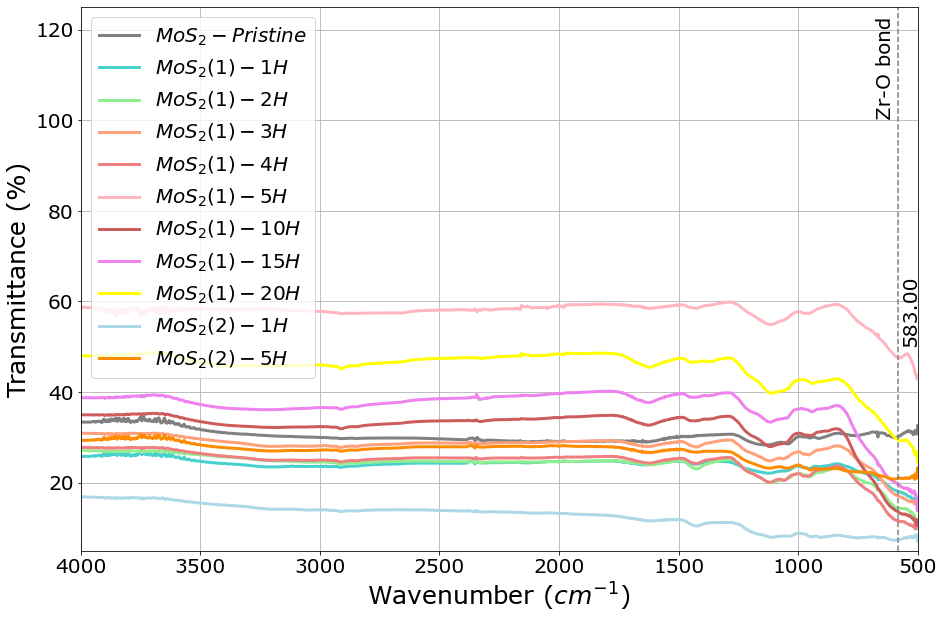

In [7]:
# Representação gráfica

plt.rcParams['font.family'] = 'Verdana'
plt.figure(figsize=(15, 10))
plt.plot(MoS2_Pristine.iloc[:,0], MoS2_Pristine.iloc[:,1], label = r'$MoS_2-Pristine$', linewidth=3, linestyle='-', color='gray')
plt.plot(MoS2_1_1H.iloc[:,0], MoS2_1_1H.iloc[:,1], label = r'$MoS_2(1)-1H$', linewidth=3, linestyle='-', color='mediumturquoise')
plt.plot(MoS2_1_2H.iloc[:,0], MoS2_1_2H.iloc[:,1], label = r'$MoS_2(1)-2H$', linewidth=3, linestyle='-', color='lightgreen')
plt.plot(MoS2_1_3H.iloc[:,0], MoS2_1_3H.iloc[:,1], label = r'$MoS_2(1)-3H$', linewidth=3, linestyle='-', color='lightsalmon')
plt.plot(MoS2_1_4H.iloc[:,0], MoS2_1_4H.iloc[:,1], label = r'$MoS_2(1)-4H$', linewidth=3, linestyle='-', color='lightcoral')
plt.plot(MoS2_1_5H.iloc[:,0], MoS2_1_5H.iloc[:,1], label = r'$MoS_2(1)-5H$', linewidth=3, linestyle='-', color='lightpink')
plt.plot(MoS2_1_10H.iloc[:,0], MoS2_1_10H.iloc[:,1], label = r'$MoS_2(1)-10H$', linewidth=3, linestyle='-', color='indianred')
plt.plot(MoS2_1_15H.iloc[:,0], MoS2_1_15H.iloc[:,1], label = r'$MoS_2(1)-15H$', linewidth=3, linestyle='-', color='violet')
plt.plot(MoS2_1_20H.iloc[:,0], MoS2_1_20H.iloc[:,1], label = r'$MoS_2(1)-20H$', linewidth=3, linestyle='-', color='yellow')
plt.plot(MoS2_2_1H.iloc[:,0], MoS2_2_1H.iloc[:,1], label = r'$MoS_2(2)-1H$', linewidth=3, linestyle='-', color='lightblue')
plt.plot(MoS2_2_5H.iloc[:,0], MoS2_2_5H.iloc[:,1], label = r'$MoS_2(2)-5H$', linewidth=3, linestyle='-', color='darkorange')
plt.xlabel(r'Wavenumber ($cm^{-1}$)', size=25)
plt.ylabel('Transmittance (%)', size=25)
plt.tick_params(labelsize=20)
plt.rcParams['legend.fontsize'] = 20
plt.xlim(500, 4000)
plt.ylim(5, 125)
plt.grid()
plt.legend(loc='upper left')
plt.gca().invert_xaxis()

# Definir intervalos não equiespaçados
intervalos = [
    (500, 600)
]

# Encontrar o menor ponto em cada intervalo
minimos_encontrados = []

# Anotações específicas para cada ponto mínimo
anotacoes_especificas = [
    "Zr-O bond"
]

for intervalo in intervalos:
    # Filtrar os dados dentro do intervalo
    dados_no_intervalo = MoS2_NS_amonio[(MoS2_NS_amonio.iloc[:, 0] >= intervalo[0]) & (MoS2_NS_amonio.iloc[:, 0] <= intervalo[1])]
    
    if not dados_no_intervalo.empty:
        # Encontrar o mínimo dentro do intervalo
        idx_minimo = dados_no_intervalo.iloc[:, 1].idxmin()
        minimos_encontrados.append((MoS2_NS_amonio.iloc[idx_minimo, 0], MoS2_NS_amonio.iloc[idx_minimo, 1]))

# Adicionar linhas verticais e anotações para os mínimos encontrados
for i, ponto in enumerate(minimos_encontrados):
    plt.axvline(x=ponto[0], color='gray', linestyle='--')
    
    # Anotação na base da linha (wavenumber)
    plt.annotate(f'{ponto[0]:.2f}', xy=(ponto[0], ponto[1]), 
                 xytext=(ponto[0] - 15, 50),  # Abaixo da linha
                 fontsize=20, color='black', rotation=90, verticalalignment='bottom')

    # Anotação no topo da linha (especificação)
    plt.annotate(anotacoes_especificas[i], xy=(ponto[0], ponto[1]), 
                 xytext=(ponto[0] + 10, 100),  # Acima da linha
                 fontsize=20, color='black', rotation=90, verticalalignment='bottom', horizontalalignment='right')

plt.savefig('FTIR - MoS2.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

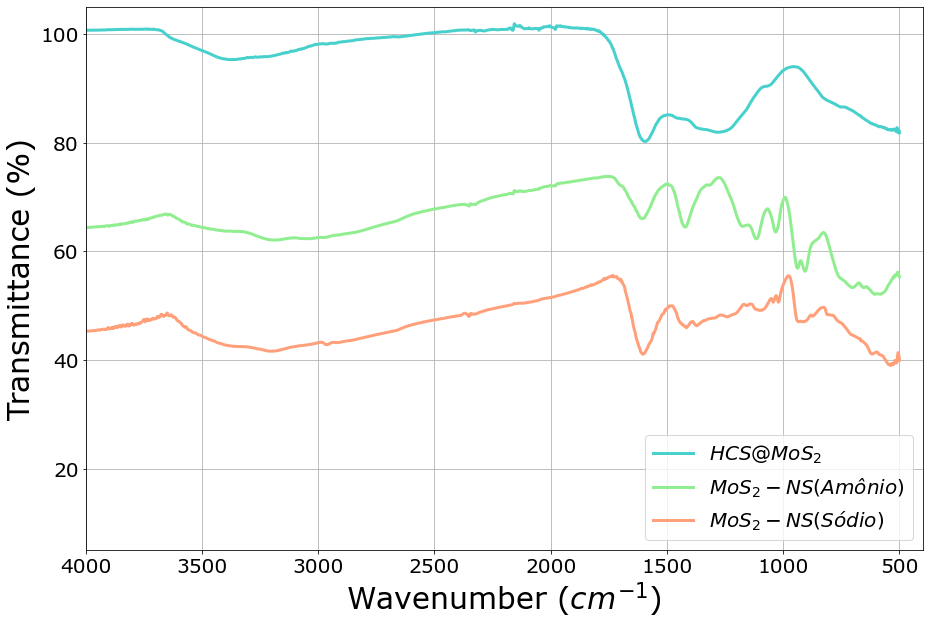

In [8]:
# Representação gráfica

plt.rcParams['font.family'] = 'Verdana'
plt.figure(figsize = (15, 10))
plt.plot(HCS_MoS2.iloc[:,0], HCS_MoS2.iloc[:,1], label = r'$HCS@MoS_2$', linewidth=3, linestyle='-', color='mediumturquoise')
plt.plot(MoS2_NS_amonio.iloc[:,0], MoS2_NS_amonio.iloc[:,1], label = r'$MoS_2-NS(Amônio)$', linewidth=3, linestyle='-', color='lightgreen')
plt.plot(MoS2_NS_sodio.iloc[:,0], MoS2_NS_sodio.iloc[:,1], label = r'$MoS_2-NS(Sódio)$', linewidth=3, linestyle='-', color='lightsalmon')
plt.xlabel(r'Wavenumber ($cm^{-1}$)', size=30)
plt.ylabel('Transmittance (%)', size=30)
#plt.title('FTIR', size=40)
plt.tick_params(labelsize=20)
plt.rcParams['legend.fontsize'] = 20
plt.xlim(400,4000)
plt.ylim(5,105)
plt.gca().invert_xaxis()
plt.grid()
plt.legend(loc='lower right')
#plt.savefig('FTIR - MoS2', dpi=300)
plt.show()

### ILUM

4000cm-1 a 400cm-1 Precisão: 3cm-1 Acumulação: 50 varreduras

In [9]:
HCS_MoS2_1 = pd.read_csv("ILUM_29-10-2024\HCS_MoS2_1.txt", sep = '\t', engine='python', header=4, decimal = ',')
MoS2_NS_Amonia_1 = pd.read_csv("ILUM_29-10-2024\MoS2_NS_Amonia_1.txt", sep = '\t', engine='python', header=4, decimal = ',')
MoS2_NS_Sodio_1 = pd.read_csv("ILUM_29-10-2024\MoS2_NS_Sodio_1.txt", sep = '\t', engine='python', header=4, decimal = ',')
PDA_1 = pd.read_csv("ILUM_29-10-2024\PDA_1.txt", sep = '\t', engine='python', header=4, decimal = ',')
S7_PDA_1 = pd.read_csv("ILUM_29-10-2024\S7_PDA_1.txt", sep = '\t', engine='python', header=4, decimal = ',')
Silica_S7_1 = pd.read_csv("ILUM_29-10-2024\Silica_S7_1.txt", sep = '\t', engine='python', header=4, decimal = ',')
SiO2_SH_1 = pd.read_csv("ILUM_29-10-2024\SiO2_SH_1.txt", sep = '\t', engine='python', header=4)

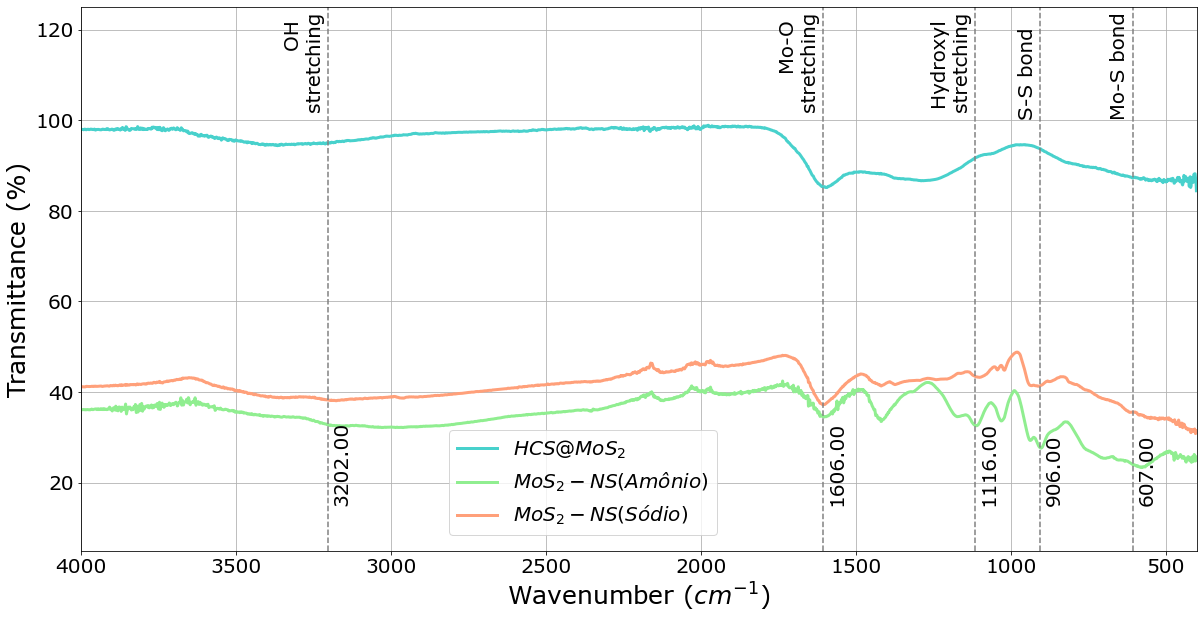

In [10]:
# Representação gráfica

plt.rcParams['font.family'] = 'Verdana'
plt.figure(figsize=(20, 10))
plt.plot(HCS_MoS2_1.iloc[:,0], HCS_MoS2_1.iloc[:,1], label = r'$HCS@MoS_2$', linewidth=3, linestyle='-', color='mediumturquoise')
plt.plot(MoS2_NS_Amonia_1.iloc[:,0], MoS2_NS_Amonia_1.iloc[:,1], label = r'$MoS_2-NS(Amônio)$', linewidth=3, linestyle='-', color='lightgreen')
plt.plot(MoS2_NS_Sodio_1.iloc[:,0], MoS2_NS_Sodio_1.iloc[:,1], label = r'$MoS_2-NS(Sódio)$', linewidth=3, linestyle='-', color='lightsalmon')
plt.xlabel(r'Wavenumber ($cm^{-1}$)', size=25)
plt.ylabel('Transmittance (%)', size=25)
plt.tick_params(labelsize=20)
plt.rcParams['legend.fontsize'] = 20
plt.xlim(400, 4000)
plt.ylim(5, 125)
plt.grid()
plt.legend(loc='lower center', bbox_to_anchor=(0.45, 0.01))
plt.gca().invert_xaxis()

# Definir intervalos não equiespaçados
intervalos = [
    (595, 610),
    (900, 910),
    (1100, 1120),
    (1600, 1650),
    (3200, 3500)
]

# Encontrar o menor ponto em cada intervalo
minimos_encontrados = []

# Anotações específicas para cada ponto mínimo
anotacoes_especificas = [
    "Mo-S bond",
    "S-S bond",
    "Hydroxyl \n stretching",
    "Mo-O \n stretching",
    "OH \n stretching"
]

for intervalo in intervalos:
    # Filtrar os dados dentro do intervalo
    dados_no_intervalo = MoS2_NS_amonio[(MoS2_NS_amonio.iloc[:, 0] >= intervalo[0]) & (MoS2_NS_amonio.iloc[:, 0] <= intervalo[1])]
    
    if not dados_no_intervalo.empty:
        # Encontrar o mínimo dentro do intervalo
        idx_minimo = dados_no_intervalo.iloc[:, 1].idxmin()
        minimos_encontrados.append((MoS2_NS_amonio.iloc[idx_minimo, 0], MoS2_NS_amonio.iloc[idx_minimo, 1]))

# Adicionar linhas verticais e anotações para os mínimos encontrados
for i, ponto in enumerate(minimos_encontrados):
    plt.axvline(x=ponto[0], color='gray', linestyle='--')
    
    # Anotação na base da linha (wavenumber)
    plt.annotate(f'{ponto[0]:.2f}', xy=(ponto[0], ponto[1]), 
                 xytext=(ponto[0] - 15, 15),  # Abaixo da linha
                 fontsize=20, color='black', rotation=90, verticalalignment='bottom')

    # Anotação no topo da linha (especificação)
    plt.annotate(anotacoes_especificas[i], xy=(ponto[0], ponto[1]), 
                 xytext=(ponto[0] + 10, 100),  # Acima da linha
                 fontsize=20, color='black', rotation=90, verticalalignment='bottom', horizontalalignment='right')

plt.savefig('FTIR - MoS2 NS.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

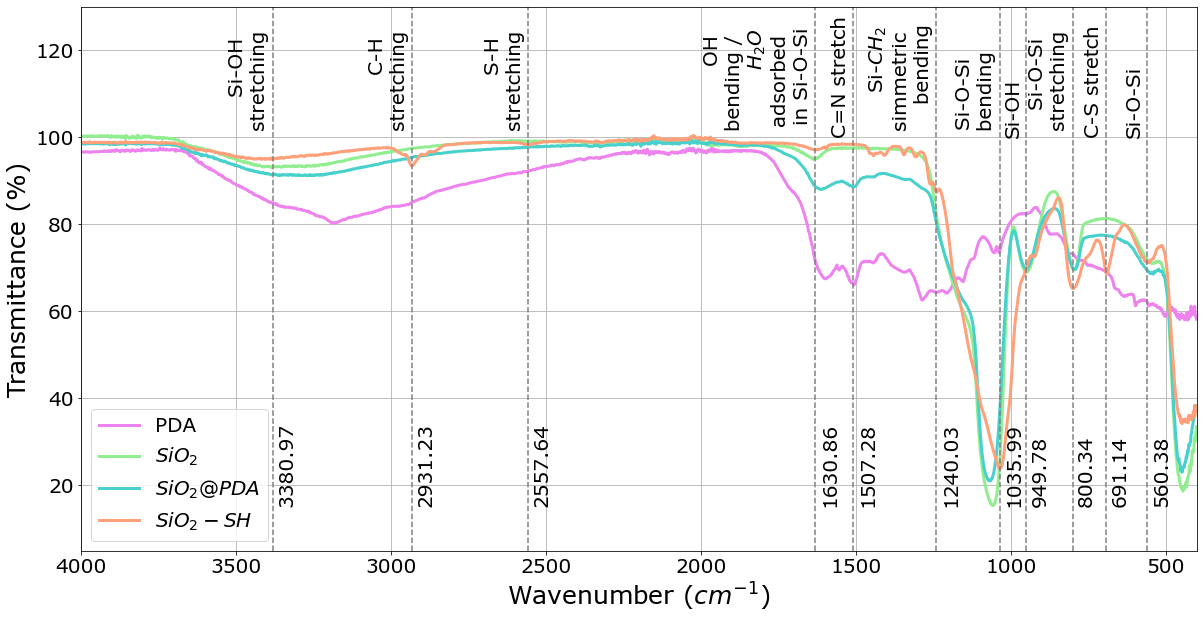

In [11]:
# Representação gráfica

plt.rcParams['font.family'] = 'Verdana'
plt.figure(figsize=(20, 10))
plt.plot(PDA_1.iloc[:,0], PDA_1.iloc[:,1], label = 'PDA', linewidth=3, linestyle='-', color='violet')
plt.plot(Silica_S7_1.iloc[:,0], Silica_S7_1.iloc[:,1], label = r'$SiO_2$', linewidth=3, linestyle='-', color='lightgreen')
plt.plot(S7_PDA_1.iloc[:,0], S7_PDA_1.iloc[:,1], label = r'$SiO_2@PDA$', linewidth=3, linestyle='-', color='mediumturquoise')
plt.plot(SiO2_SH_1.iloc[:,0], SiO2_SH_1.iloc[:,1], label = r'$SiO_2-SH$', linewidth=3, linestyle='-', color='lightsalmon')
plt.xlabel(r'Wavenumber ($cm^{-1}$)', size=25)
plt.ylabel('Transmittance (%)', size=25)
plt.tick_params(labelsize=20)
plt.rcParams['legend.fontsize'] = 20
plt.xlim(400, 4000)
plt.ylim(5, 130)
plt.grid()
plt.legend(loc='lower left')
plt.gca().invert_xaxis()

# Definir intervalos não equiespaçados
intervalos = [
    (550, 600),
    (690, 750),
    (800, 850),
    (900, 950),
    (1000, 1100),
    (1240, 1300),
    (1500, 1510),
    (1600, 1700),
    (2500, 2600),
    (2900, 3000),
    (3200, 3500)
]

# Encontrando o menor ponto em cada intervalo
minimos_encontrados = []

# Anotações específicas para cada ponto mínimo
anotacoes_especificas = [
    "Si-O-Si",
    "C-S stretch",
    "Si-O-Si \n stretching",
    "Si-OH",
    "Si-O-Si \n bending",
    "Si-$CH_2$ \n simmetric \n bending",
    "C=N stretch",
    "OH \n bending / \n $H_2O$ \n adsorbed \n in Si-O-Si",
    "S-H \n stretching",
    "C-H \n stretching",
    "Si-OH \n stretching"
]

for intervalo in intervalos:
    # Filtrar os dados dentro do intervalo
    dados_no_intervalo = SiO2_SH_1[(SiO2_SH_1.iloc[:, 0] >= intervalo[0]) & (SiO2_SH_1.iloc[:, 0] <= intervalo[1])]
    
    if not dados_no_intervalo.empty:
        # Encontrar o mínimo dentro do intervalo
        idx_minimo = dados_no_intervalo.iloc[:, 1].idxmin()
        minimos_encontrados.append((SiO2_SH_1.iloc[idx_minimo, 0], SiO2_SH_1.iloc[idx_minimo, 1]))

# Adicionar linhas verticais e anotações para os mínimos encontrados
for i, ponto in enumerate(minimos_encontrados):
    plt.axvline(x=ponto[0], color='gray', linestyle='--')
    
    # Anotação na base da linha (wavenumber)
    plt.annotate(f'{ponto[0]:.2f}', xy=(ponto[0], ponto[1]), 
                 xytext=(ponto[0] - 15, 15),  # Abaixo da linha
                 fontsize=20, color='black', rotation=90, verticalalignment='bottom')

    # Anotação no topo da linha (especificação)
    plt.annotate(anotacoes_especificas[i], xy=(ponto[0], ponto[1]), 
                 xytext=(ponto[0] + 10, 100),  # Acima da linha
                 fontsize=20, color='black', rotation=90, verticalalignment='bottom', horizontalalignment='right')

plt.savefig('FTIR - Silica e PDA.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()